# Assignment -5 **Optical Flow** 
#### Rollno: 2018201097
#### Name: Aman Joshi

## Optical Flow:
Optical flow or optic flow is the pattern of apparent motion of objects, surfaces, and edges in a visual scene caused by the relative motion between an observer and a scene.
Optical flow can also be defined as the distribution of apparent velocities of movement of brightness pattern in an image. We assume that the Intensities of point doesn't change between respective frames.
\begin{equation*}
I(x,y,t) = I(x+\Delta x, y + \Delta y, t + \Delta t)
\end{equation*}
\begin{equation}
I(x+\Delta x,y+\Delta y,t+\Delta t) = I(x,y,t) + \frac{\partial I}{\partial x}\Delta x+\frac{\partial I}{\partial y}\Delta y+\frac{\partial I}{\partial t}\Delta t+H.O.T.
\end{equation}
<br>
From Equation 1 we have
\begin{equation*}
\frac{\partial I}{\partial x}\Delta x+\frac{\partial I}{\partial y}\Delta y+\frac{\partial I}{\partial t}\Delta t = 0
\end{equation*}
\begin{equation*}
\frac{\partial I}{\partial x}\frac{\Delta x}{\Delta t}+\frac{\partial I}{\partial y}\frac{\Delta y}{\Delta t}+\frac{\partial I}{\partial t}\frac{\Delta t}{\Delta t} = 0
\end{equation*}

<br>
\begin{equation*}
\frac{\partial I}{\partial x}V_x+\frac{\partial I}{\partial y}V_y+\frac{\partial I}{\partial t} = 0
\end{equation*}




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

SyntaxError: invalid syntax (<ipython-input-2-58bcd8c374aa>, line 4)

In [3]:
def optical_flow(frame1, frame2, win=2):
    Ix = np.zeros(frame1.shape).astype(np.float32)
    Iy = np.zeros(frame1.shape).astype(np.float32)
    It = np.zeros(frame1.shape).astype(np.float32)

    Ix[1:-1, 1:-1] = cv.subtract(frame1[1:-1, 2:], frame1[1:-1, :-2]) / 2
    Iy[1:-1, 1:-1] = cv.subtract(frame1[2:, 1:-1], frame1[:-2, 1:-1]) / 2
    It[1:-1, 1:-1] = cv.subtract(frame1[1:-1, 1:-1], frame2[1:-1, 1:-1])

    params = np.zeros(frame1.shape + (5, ))
    params[..., 0] = Ix**2
    params[..., 1] = Iy**2
    params[..., 2] = Ix * Iy
    params[..., 3] = Ix * It
    params[..., 4] = Iy * It
    del It, Ix, Iy
    cum_params = np.cumsum(np.cumsum(params, axis=0), axis=1)
    del params
    win_params = (cum_params[2 * win + 1:, 2 * win + 1:] -
                  cum_params[2 * win + 1:, :-1 - 2 * win])
    win_params -= cum_params[:-1 - 2 * win, 2 * win + 1:]
    win_params += cum_params[:-1 - 2 * win, :-1 - 2 * win]
    del cum_params
    op_flow = np.zeros(frame1.shape + (2, ))
    det = win_params[..., 0] * win_params[..., 1] - win_params[..., 2]**2

    op_flow_x = np.where(det != 0,
                         (win_params[..., 1] * win_params[..., 3] -
                          win_params[..., 2] * win_params[..., 4]) / det, 0)
    op_flow_y = np.where(det != 0,
                         (win_params[..., 0] * win_params[..., 4] -
                          win_params[..., 2] * win_params[..., 3]) / det, 0)
    op_flow[win + 1:-1 - win, win + 1:-1 - win, 0] = op_flow_x[:-1, :-1]
    op_flow[win + 1:-1 - win, win + 1:-1 - win, 1] = op_flow_y[:-1, :-1]
    op_flow = op_flow.astype(np.float32)
    return op_flow

In [4]:
def draw_flow(img, flow):
    x = np.arange(0, img.shape[1], 1)
    y = np.arange(0, img.shape[0], 1)
    x, y = np.meshgrid(x, y)
    plt.figure()
    fig = plt.imshow(img, cmap='gray', interpolation='bicubic')
    plt.axis('off')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    step = img.shape[0] / 20
    step = int(step)
    plt.quiver(
        x[::step, ::step],
        y[::step, ::step],
        flow[::step, ::step, 0],
        flow[::step, ::step, 1],
        color='r',
        pivot='middle',
        headwidth=2,
        headlength=3)
    plt.axis('off')
    plt.show()

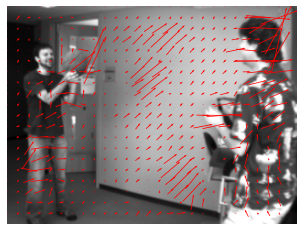

In [5]:
image1 = cv.imread("eval-data-gray/Basketball/frame10.png", 0)
image2 = cv.imread("eval-data-gray/Basketball/frame11.png", 0)
flow = optical_flow(image1, image2, 15)
draw_flow(image1, flow)

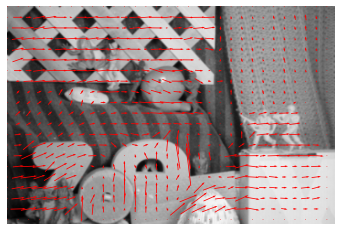

In [6]:
image1 = cv.imread("eval-data-gray/Army/frame10.png", 0)
image2 = cv.imread("eval-data-gray/Army/frame11.png", 0)
flow = optical_flow(image1, image2, 15)
draw_flow(image1, flow)

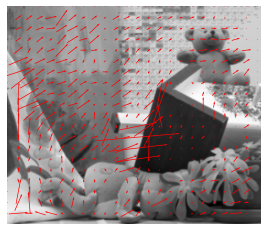

In [7]:
image1 = cv.imread("eval-data-gray/Teddy/frame10.png", 0)
image2 = cv.imread("eval-data-gray/Teddy/frame11.png", 0)
flow = optical_flow(image1, image2, 15)
draw_flow(image1, flow)

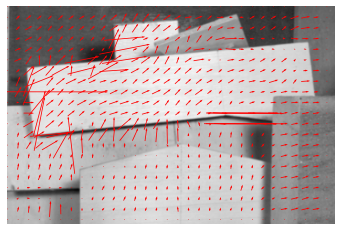

In [8]:
image1 = cv.imread("eval-data-gray/Wooden/frame10.png", 0)
image2 = cv.imread("eval-data-gray/Wooden/frame11.png", 0)
flow = optical_flow(image1, image2, 15)
draw_flow(image1, flow)

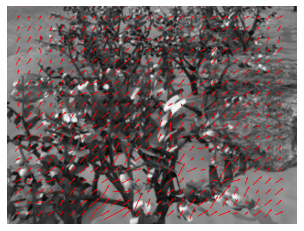

In [9]:
image1 = cv.imread("eval-data-gray/Grove/frame10.png", 0)
image2 = cv.imread("eval-data-gray/Grove/frame11.png", 0)
flow = optical_flow(image1, image2, 15)
draw_flow(image1, flow)

### Detection and segmentation of moving objects in a video
Implementation Details:
- Get the flow between consecutive frames of a video
- Using cv2.cartToPolar() function get the magnitude of flow
- Apply thresholds and convert the magnitude array to hsv for better visualization

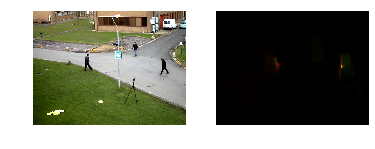

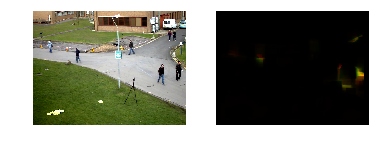

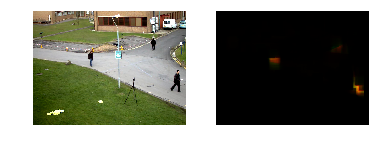

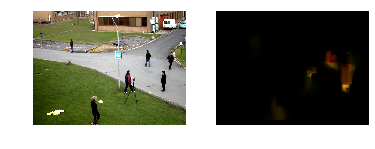

In [12]:
cap = cv.VideoCapture("vtest.avi")

ret, frame1 = cap.read()
prvs = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255
count = -1
while True:
    ret, frame2 = cap.read()
    count += 1
    if count % 200 != 0:
        continue
    if ret is False:
        break
    next = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)

    flow = optical_flow(prvs, next, 24)

    mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
    rgb = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(frame2, cv.COLOR_BGR2RGB))
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(rgb, cv.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    prvs = next
cap.release()

### Tracking of objects in a video sequence
Implementation Details:
- Get the flow between consecutive frames of a video
- Using cv2.cartToPolar() function get the magnitude of flow
- Convert the magnitude array to hsv and apply thresholds to get the dominant areas
- Find the contours using cv2.findContours() method from the thresholded magnitude array
- Draw bounded boxes for the different countours

In [15]:
def draw_hsv(flow, prev, change=True):
    hsv = np.zeros_like(prev)
    hsv[..., 1] = 255
    mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
    if change:
        hsv = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    return hsv

In [37]:
def track_moving_objects(frame, prev):
    def gray(img):
        return cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    flow = optical_flow(gray(prev), gray(frame), 24)
    hsv1 = draw_hsv(flow, prev)
    gray1 = cv.cvtColor(hsv1, cv.COLOR_BGR2GRAY)
    thresh = cv.threshold(gray1, 25, 0xFF, cv.THRESH_BINARY)[1]
    thresh = cv.dilate(thresh, None, iterations=5)

    cnts, hierarchy = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL,
                                      cv.CHAIN_APPROX_SIMPLE)

    for c in cnts:
        (x, y, w, h) = cv.boundingRect(c)
        if w > 15 and h > 15 and w < 900 and h < 680:
            cv.rectangle(frame, (x, y), (x + w, y + h), (0, 0xFF, 0), 4)
    return frame

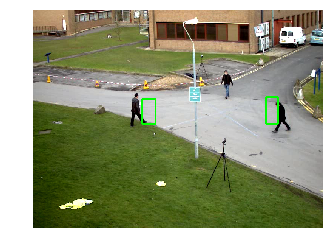

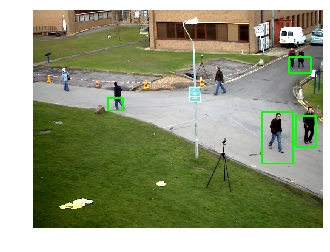

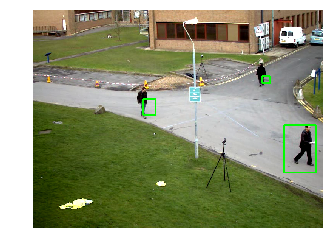

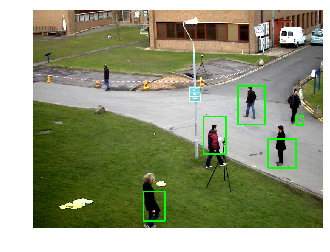

In [38]:
cap = cv.VideoCapture("vtest.avi")
ret, frame1 = cap.read()
count = -1
while True:
    ret, frame2 = cap.read()
    count += 1
    if count % 200 != 0:
        continue
    if ret is False:
        break
    objected_frame = track_moving_objects(frame2, frame1)
    plt.imshow(cv.cvtColor(frame2, cv.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    prvs = next
cap.release()

/home/aman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/home/aman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/home/aman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/home/aman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


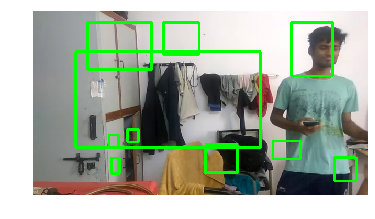

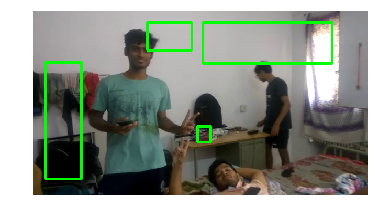

In [39]:
cap = cv.VideoCapture("test.mp4")
ret, frame1 = cap.read()
count = -1
while True:
    ret, frame2 = cap.read()
    count += 1
    if count % 200 != 0:
        continue
    if ret is False:
        break
    objected_frame = track_moving_objects(frame2, frame1)
    plt.imshow(cv.cvtColor(frame2, cv.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    prvs = next
cap.release()